# Exploring the relationship between factors of wellbeing and suicide rate

# Overview

In this project, we check if there are any relationships between the subfactors of national happiness measured in the World Happiness Report and suicide rates across nations. Since the datasets for the World Happiness report and global suicide rates are different, we merge them and use the overlapping years for analysis. Specifically, we choose and plot a subset of variables, such as GDP and Freedom Level, to see their correlation with the suicide rate throughout the overlapping years. The results show that there is no significant relationship between subfactors of Happiness Level and suicide rate.

# Names

- Qianying Huang
- Yang Zheng
- Zhigang Lin 
- Youyou Wu
- Ethan Huang


<a id='research_question'></a>
# Research Question

Are a country’s subfactors of wellbeing measured in the World Happiness Report for a particular year: “logged GDP per capita”, “social support”, “healthy life expectancy”, “freedom to make life choices”, “generosity”, and “perception of corruption”, correlated with that country’s suicide rate for that year? Within these six factors, which factor has the strongest correlation with suicide rates?

<a id='background'></a>

## Background & Prior Work

*The World Happiness Report* is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The report looks at six key variables to come to a happiness score: levels of GDP, life expectancy, generosity, social support, freedom, and corruption. A previous study *Visualizing Suicide Rates and World Happiness* found no significant relationship between national reported happiness and national suicide rates, arguing that suicide is complicated and may be more strongly related to other factors such as gun prevalence and education. Another study *Differences in US. Suicide Rates by Educational Attainment* found that higher levels of education attainment are indeed related to lower suicide rates. However, *Visualizing Suicide Rates and World Happiness* reporting no relationship between happiness levels and suicide rates did not analyse any of the subfactors of happiness studied in the World Happiness Report.


#### References
Kajla, A. (2019, December 16). Visualizing Suicide Rates and World Happiness. Retrieved January 30, 2021, from https://towardsdatascience.com/visualizing-suicide-rates-and-world-happiness-bc4e6411732f

Phillips, J. A., & Hempstead, K. (2017). Differences in U.S. Suicide Rates by Educational Attainment, 2000-2014. American journal of preventive medicine, 53(4), e123–e130. https://doi.org/10.1016/j.amepre.2017.04.010 (https://pubmed.ncbi.nlm.nih.gov/28756896/)

# Hypothesis


We hypothesize that the "logged GDP per capita" factor in the World Happiness Report may be related to national suicide rates, or more strongly related to national suicide rates in tandem with another factor (e.g. education levels), than the other factor alone.

# Dataset(s)

We will analyze two sources of data. One is the 2016 World Happiness Report, which includes data from 2006 to 2015. The other is a Kaggle database of world suicide rates from 1985 to 2016.

1)
Dataset Name: World Happiness Report <br>
Link: https://worldhappiness.report/ed/2016/ <br>
https://worldhappiness.report/ed/2015/ <br>
Number of observations: 1274 <br>
Description: This dataset contains rankings of national happiness scores, based on respondent ratings of their own lives. It also measures subfactors that contribute to happiness, such as education, poverty and health. 

2)
Dataset Name: Suicide Rates Overview 1985 to 2016 <br>
Link: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 <br>
Number of observations: 27820 <br>
Description: This dataset contains informations about the signals correlated to the suicide rates among different region globally, including the country, year, sex, number of suicides, population of the country, GDP (Gross Domestic Product) of the country, HDI for the year, and some derived data such as suicide number per 100k pupulation, country-year, and gdp per capita (per person).


We will combine the data sets so that country/year (e.g. “U.S. 2016”, “China 2015”) is the grouping variable, with the subfactors of the world happiness report (“Logged GDP per capita”, “Social support”, “Healthy life expectancy”, “Freedom to make life choices”, “Generosity”, and “Perception of corruption”) and total number of suicides in that country for that year as the attributes.

# Setup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
from scipy.stats import normaltest
from scipy import stats
import patsy
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'

# Data Cleaning

Import the two data sources we'll be using.

In [3]:
# the relevant data from the 2016 World Happiness Report, which contains each happiness subfactor
# organized by country and year, with data from 2006 to 2015 (though not complete for every country)
df_whr = pd.read_excel('https://s3.amazonaws.com/happiness-report/2016/Online-data-for-chapter-2-whr-2016.xlsx', sheet_name = 'Data for Table2.1')
df_whr

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183399,0.881686,...,NaN,NaN,0.476129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204900,0.850035,...,NaN,NaN,0.440242,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138773,0.706766,...,NaN,NaN,0.326761,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176339,0.731109,...,NaN,NaN,0.342830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247900,0.775620,...,NaN,NaN,0.312081,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Zimbabwe,Zimbabwe,2011,4.845642,7.328846,0.864694,43.593414,0.632978,-0.048538,0.829800,...,NaN,NaN,0.510974,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1270,Zimbabwe,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059616,0.858691,...,NaN,NaN,0.492429,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1271,Zimbabwe,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062756,0.830937,...,NaN,NaN,0.557921,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942
1272,Zimbabwe,Zimbabwe,2014,4.184451,7.443748,0.765839,48.681438,0.642034,-0.033272,0.820217,...,NaN,NaN,0.599189,NaN,NaN,NaN,NaN,0.116683,NaN,0.082942


In [4]:
# the kaggle dataset on world suicide rates from 1985 to 2016, 
# from https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
df_suicide = pd.read_csv('suicide_rates.csv')
df_suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Process the suicide rates dataset

In [5]:
# drop subpopulation-specific columns and 'country' and 'year' since we will group by country-year
# drop gdp-related columns since GDP is already included in the WHR
df_suicidec = df_suicide.drop(['country', 'year', 'sex', 'age', 'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'], axis=1)

# sum other values by country and year
df_suicidec = df_suicidec.groupby(['country-year']).sum()
df_suicidec

,suicides_no,population,suicides/100k pop
country-year,,,
Albania1987,73,2709600,31.85
Albania1988,63,2764300,32.46
Albania1989,68,2803100,33.40
Albania1992,47,2822500,18.00
Albania1993,73,2807300,32.56
...,...,...,...
Uzbekistan2010,1464,25651783,63.23
Uzbekistan2011,1640,25978049,67.14
Uzbekistan2012,1835,26381830,77.53


Join the two datasets by country-year

In [6]:
# create new country-year column for the World Happiness Report dataframe
df_whr['country-year'] = df_whr['country'] + df_whr['year'].map(str)

# join the two datasets on country-year
df_joined = df_suicidec.merge(df_whr, on='country-year', how='inner')
df_joined

,country-year,suicides_no,population,suicides/100k pop,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Albania2007,124,2770344,65.85,Albania,Albania,2007,4.634252,8.984321,0.821372,...,NaN,0.305000,0.340275,NaN,NaN,NaN,0.243243,0.232000,NaN,NaN
1,Albania2009,0,2745735,0.00,Albania,Albania,2009,5.485470,9.104283,0.833047,...,NaN,0.305000,0.326784,0.111004,NaN,NaN,0.243243,0.232000,NaN,NaN
2,Albania2010,96,2736025,41.66,Albania,Albania,2010,5.268937,9.145677,0.733152,...,NaN,0.305000,0.454093,0.201118,NaN,NaN,0.243243,0.232000,NaN,NaN
3,Argentina2006,3108,35918886,128.22,Argentina,Argentina,2006,6.312925,9.520737,0.938463,...,0.4826,0.479421,0.371370,NaN,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531
4,Argentina2007,2946,36315492,118.35,Argentina,Argentina,2007,6.073158,9.594051,0.862206,...,0.4737,0.479421,0.361416,NaN,0.270073,0.223553,0.170844,0.150154,0.174058,0.193531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Uzbekistan2010,1464,25651783,63.23,Uzbekistan,Uzbekistan,2010,5.095342,8.339296,0.903226,...,NaN,0.348033,0.337862,NaN,NaN,NaN,NaN,NaN,NaN,0.139224
583,Uzbekistan2011,1640,25978049,67.14,Uzbekistan,Uzbekistan,2011,5.738744,8.392191,0.924071,...,NaN,0.348033,0.338050,NaN,NaN,NaN,NaN,NaN,NaN,0.139224
584,Uzbekistan2012,1835,26381830,77.53,Uzbekistan,Uzbekistan,2012,6.019332,8.456281,0.933141,...,NaN,0.348033,0.329201,NaN,NaN,NaN,NaN,NaN,NaN,0.139224
585,Uzbekistan2013,1950,26838924,78.86,Uzbekistan,Uzbekistan,2013,5.939986,8.517623,0.962781,...,NaN,0.348033,0.309935,NaN,NaN,NaN,NaN,NaN,NaN,0.139224


We then drop all the datas that contains null value in these six columns that we want to analyze.

In [7]:
df_joined = df_joined.dropna(subset=['Log GDP per capita', 'Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption'])

We notice that the data from these two datasets have inconsistent range of year, some have more data and some have less data. For example, the country of Cuba only has 1 year of data. Therefore, we want to find out what range of year does most data appear in.

Text(0.5, 1.0, 'Freequency of Year in the Datasets')

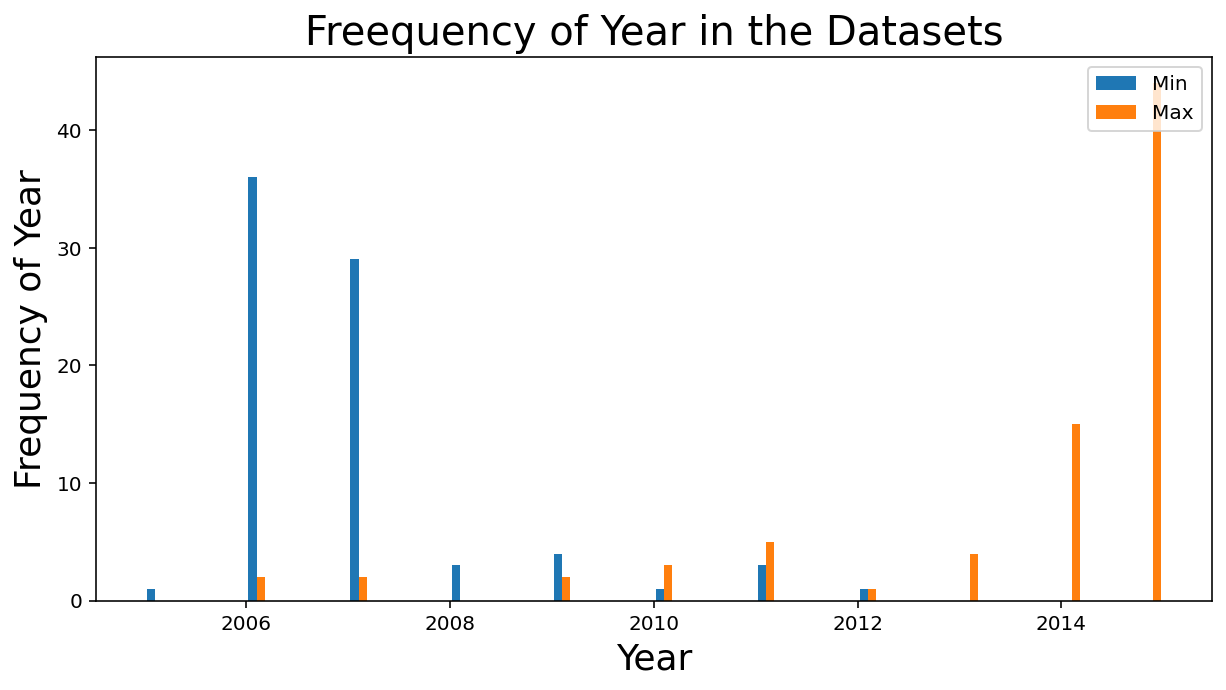

In [8]:
#Find out what is the min and max year of each country
minVal = df_joined['year'].min()
maxVal = df_joined['year'].max()


uni = df_joined.country.unique()

col = df_joined.columns

maxList = []
minList = []

for una in uni:
    list1 = []
    for index, row in df_joined.iterrows():
        if row.country == una:
            list1.append(row)
    df = pd.DataFrame(list1, columns=col)
    
    minList.append(df['year'].min())
    maxList.append(df['year'].max())

#Plotting the frequency of the year appeared in our data
plt.figure(figsize=(10, 5))
plt.hist([minList, maxList], bins = 50, label=['Min', 'Max'])
plt.legend(loc='upper right')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency of Year', fontsize=18)
plt.title('Freequency of Year in the Datasets', fontsize=20)



We can see that most of the data are within the range of 2006 and 2015. Therefore, we exclude the data that is outside of this range.

In [9]:
#Extracting the data that are within the range of 2006 - 2015.
col = df_joined.columns
df_d = pd.DataFrame()
list1 = []
for una in uni:
    list1 = []
    for index, row in df_joined.iterrows():
        if row.country == una:
            list1.append(row)
    df = pd.DataFrame(list1, columns=col)
    
    minV = df['year'].min()
    maxV = df['year'].min()
    if ( (minV>2005) & (maxV <= 2015)):
        df_d = df_d.append(df)

Since our research question focus mainly on six factors: “logged GDP per capita”, “social support”, “healthy life expectancy”, “freedom to make life choices”, “generosity”, and “perception of corruption”. We will drop other factors from the World Happniess Report.

In [10]:
df = df_d[['country-year','suicides/100k pop','Log GDP per capita','Social support','Healthy life expectancy at birth', 
                'Freedom to make life choices','Generosity','Perceptions of corruption','country','year']]
df

,country-year,suicides/100k pop,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,country,year
0,Albania2007,65.85,8.984321,0.821372,67.165077,0.528605,-0.008008,0.874700,Albania,2007
1,Albania2009,0.00,9.104283,0.833047,67.461113,0.525223,-0.157673,0.863665,Albania,2009
2,Albania2010,41.66,9.145677,0.733152,67.616264,0.568958,-0.172373,0.726262,Albania,2010
3,Argentina2006,128.22,9.520737,0.938463,65.986099,0.733004,-0.141018,0.851799,Argentina,2006
4,Argentina2007,118.35,9.594051,0.862206,66.126396,0.652833,-0.125471,0.881058,Argentina,2007
...,...,...,...,...,...,...,...,...,...,...
580,Uruguay2015,270.02,9.917072,0.891493,68.116402,0.916880,-0.048587,0.673476,Uruguay,2015
583,Uzbekistan2011,67.14,8.392191,0.924071,60.098606,0.934133,0.043543,0.521862,Uzbekistan,2011
584,Uzbekistan2012,77.53,8.456281,0.933141,60.207886,0.913550,-0.036957,0.463375,Uzbekistan,2012
585,Uzbekistan2013,78.86,8.517623,0.962781,60.317142,0.949540,-0.034368,0.433932,Uzbekistan,2013


# Data Analysis & Results

In [11]:
df.shape

(518, 10)

After cleaning the data, our new dataframe now contains 518 observations and 10 variables.

In [12]:
df.dtypes

country-year                         object
suicides/100k pop                   float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
country                              object
year                                  int64
dtype: object

We have mostly continuous numerical variables, with the exception of some string data such as country name. For the sake of analysis, we drop all the rows that contains null values within these six columns, which are 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity' and 'Perceptions of corruption'.

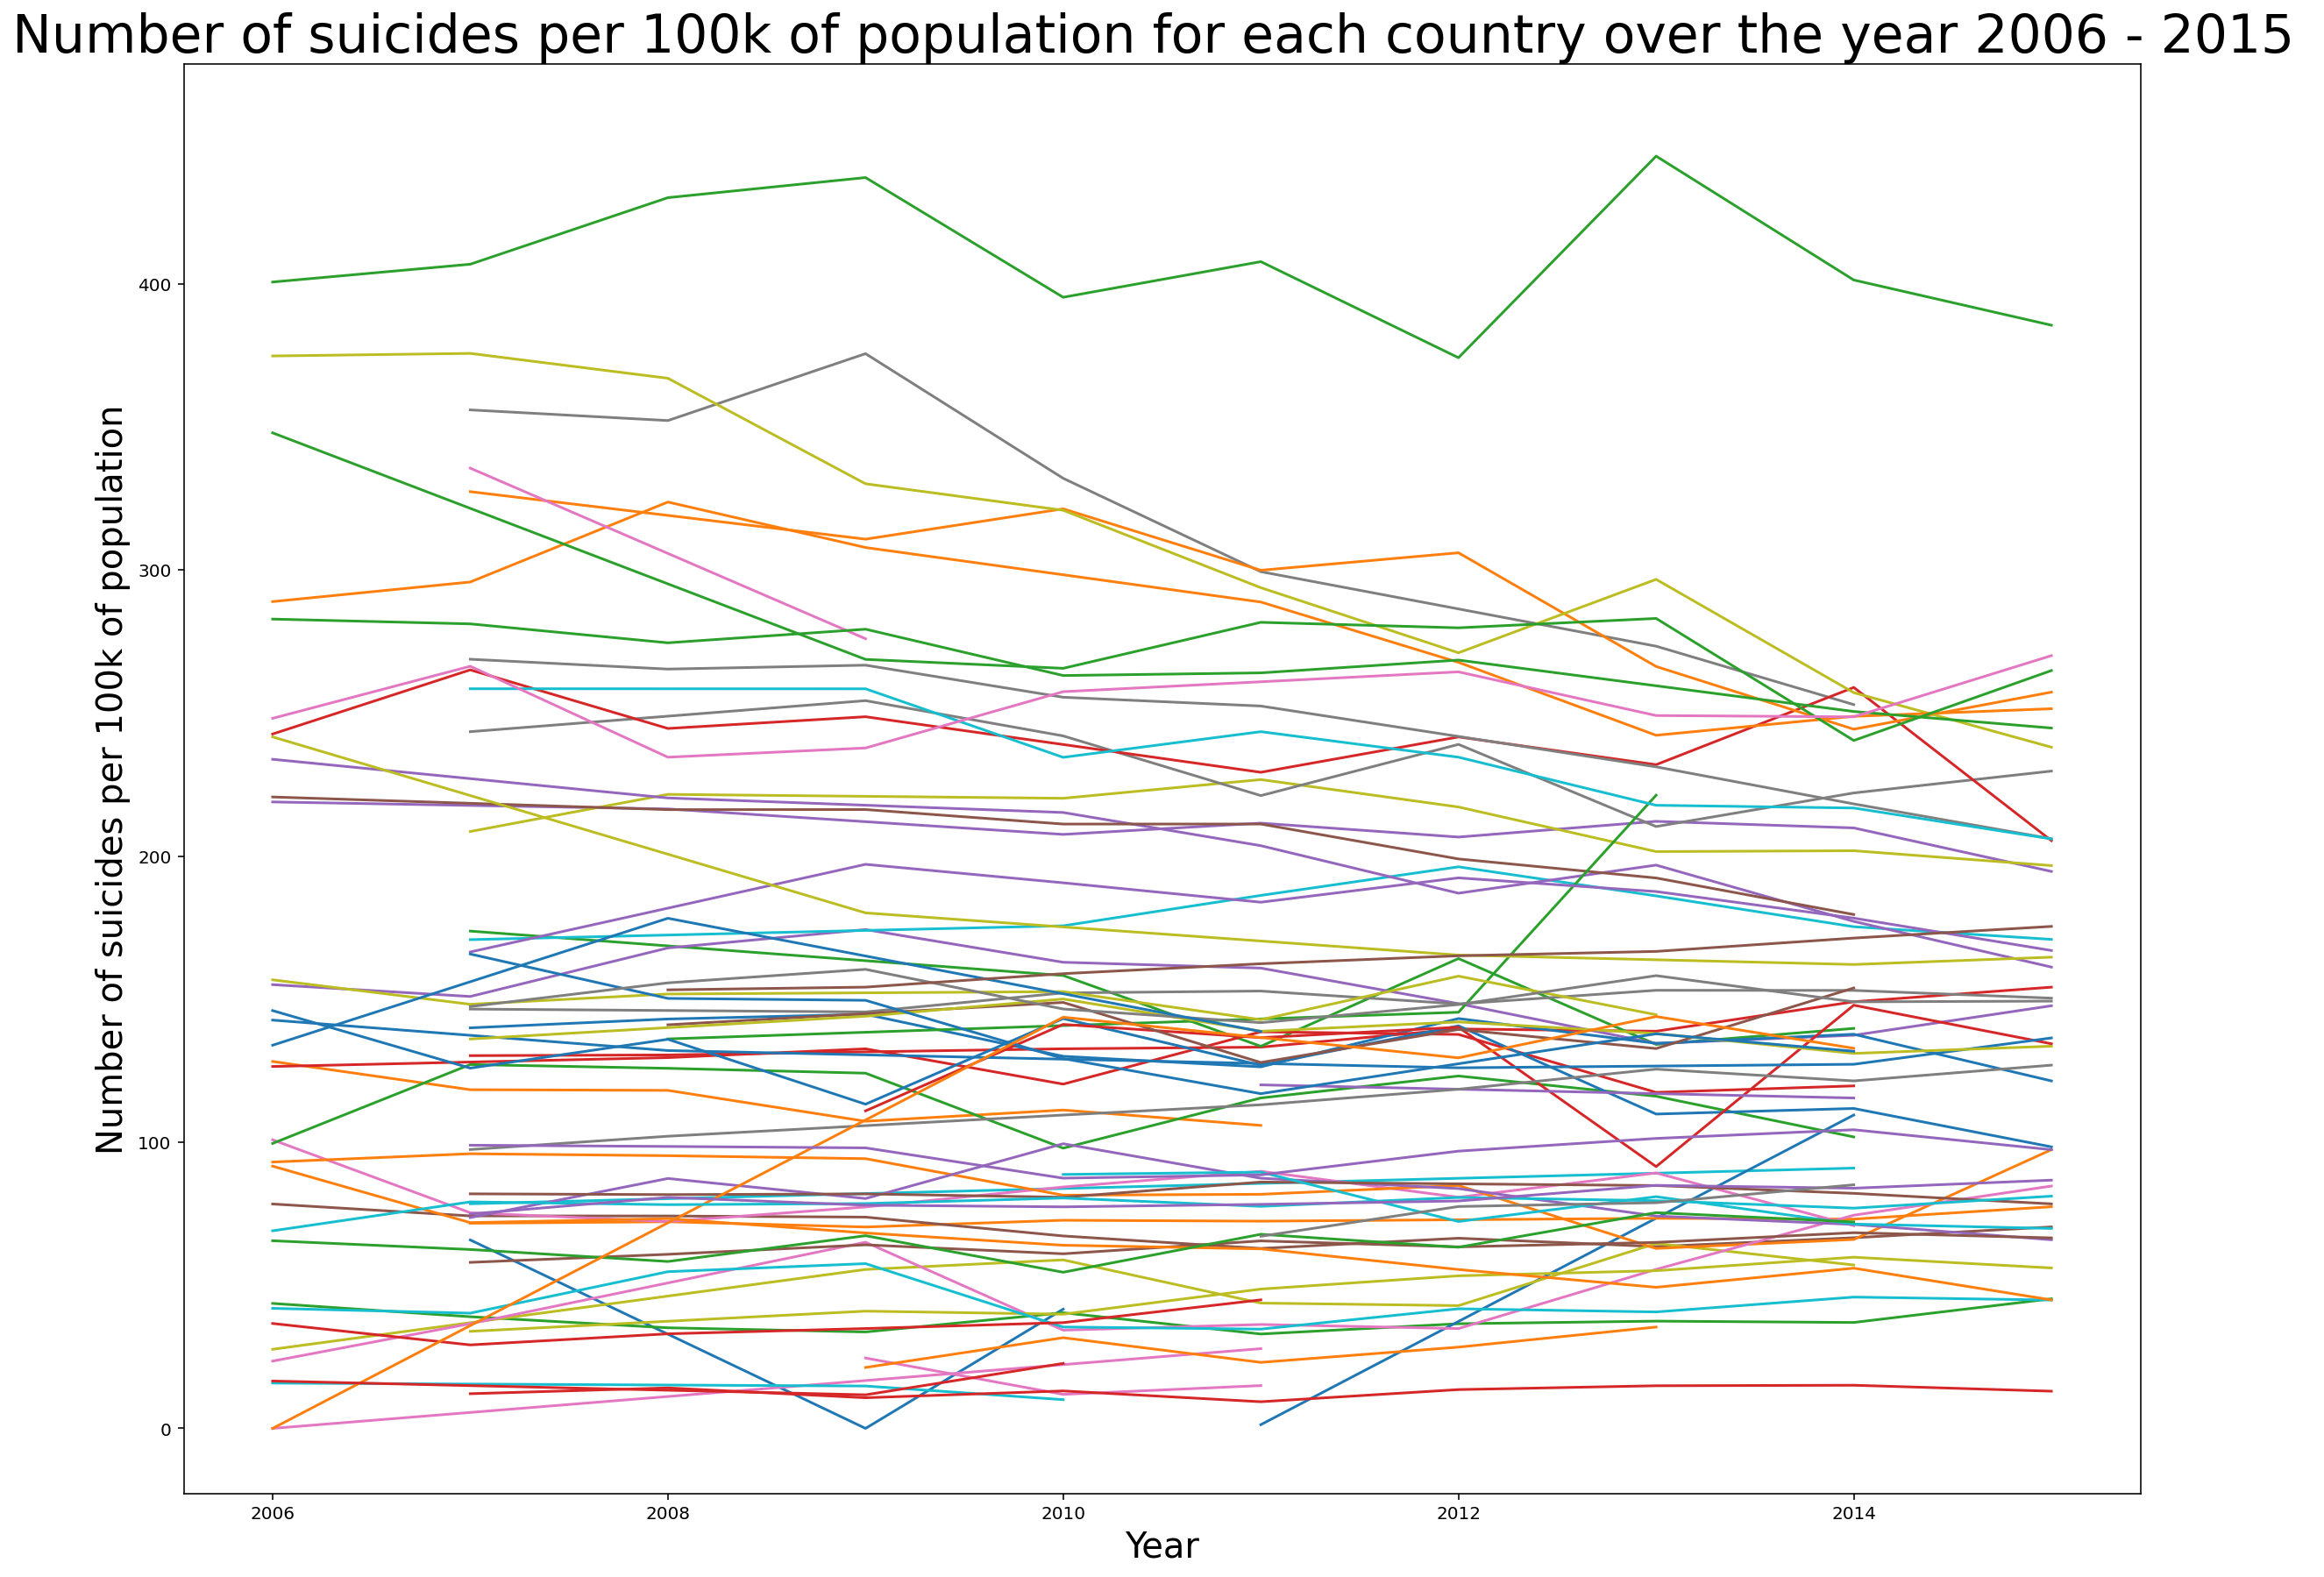

In [13]:
col = df.columns
df1 = pd.DataFrame()
list1 = []
plt.figure(figsize=(20, 15))
plt.xlabel('Year', fontsize = 20)
plt.title('Number of suicides per 100k of population for each country over the year 2006 - 2015 ', fontsize = 30)
plt.ylabel('Number of suicides per 100k of population', fontsize = 20)
for una in uni:
    list1 = []
    for index, row in df.iterrows():
        if row.country == una:
            list1.append(row)
    df1 = pd.DataFrame(list1, columns=col)
    plt.plot(df1['year'], df1['suicides/100k pop'])


Text(0, 0.5, 'Means of number of suicides per 100k of population')

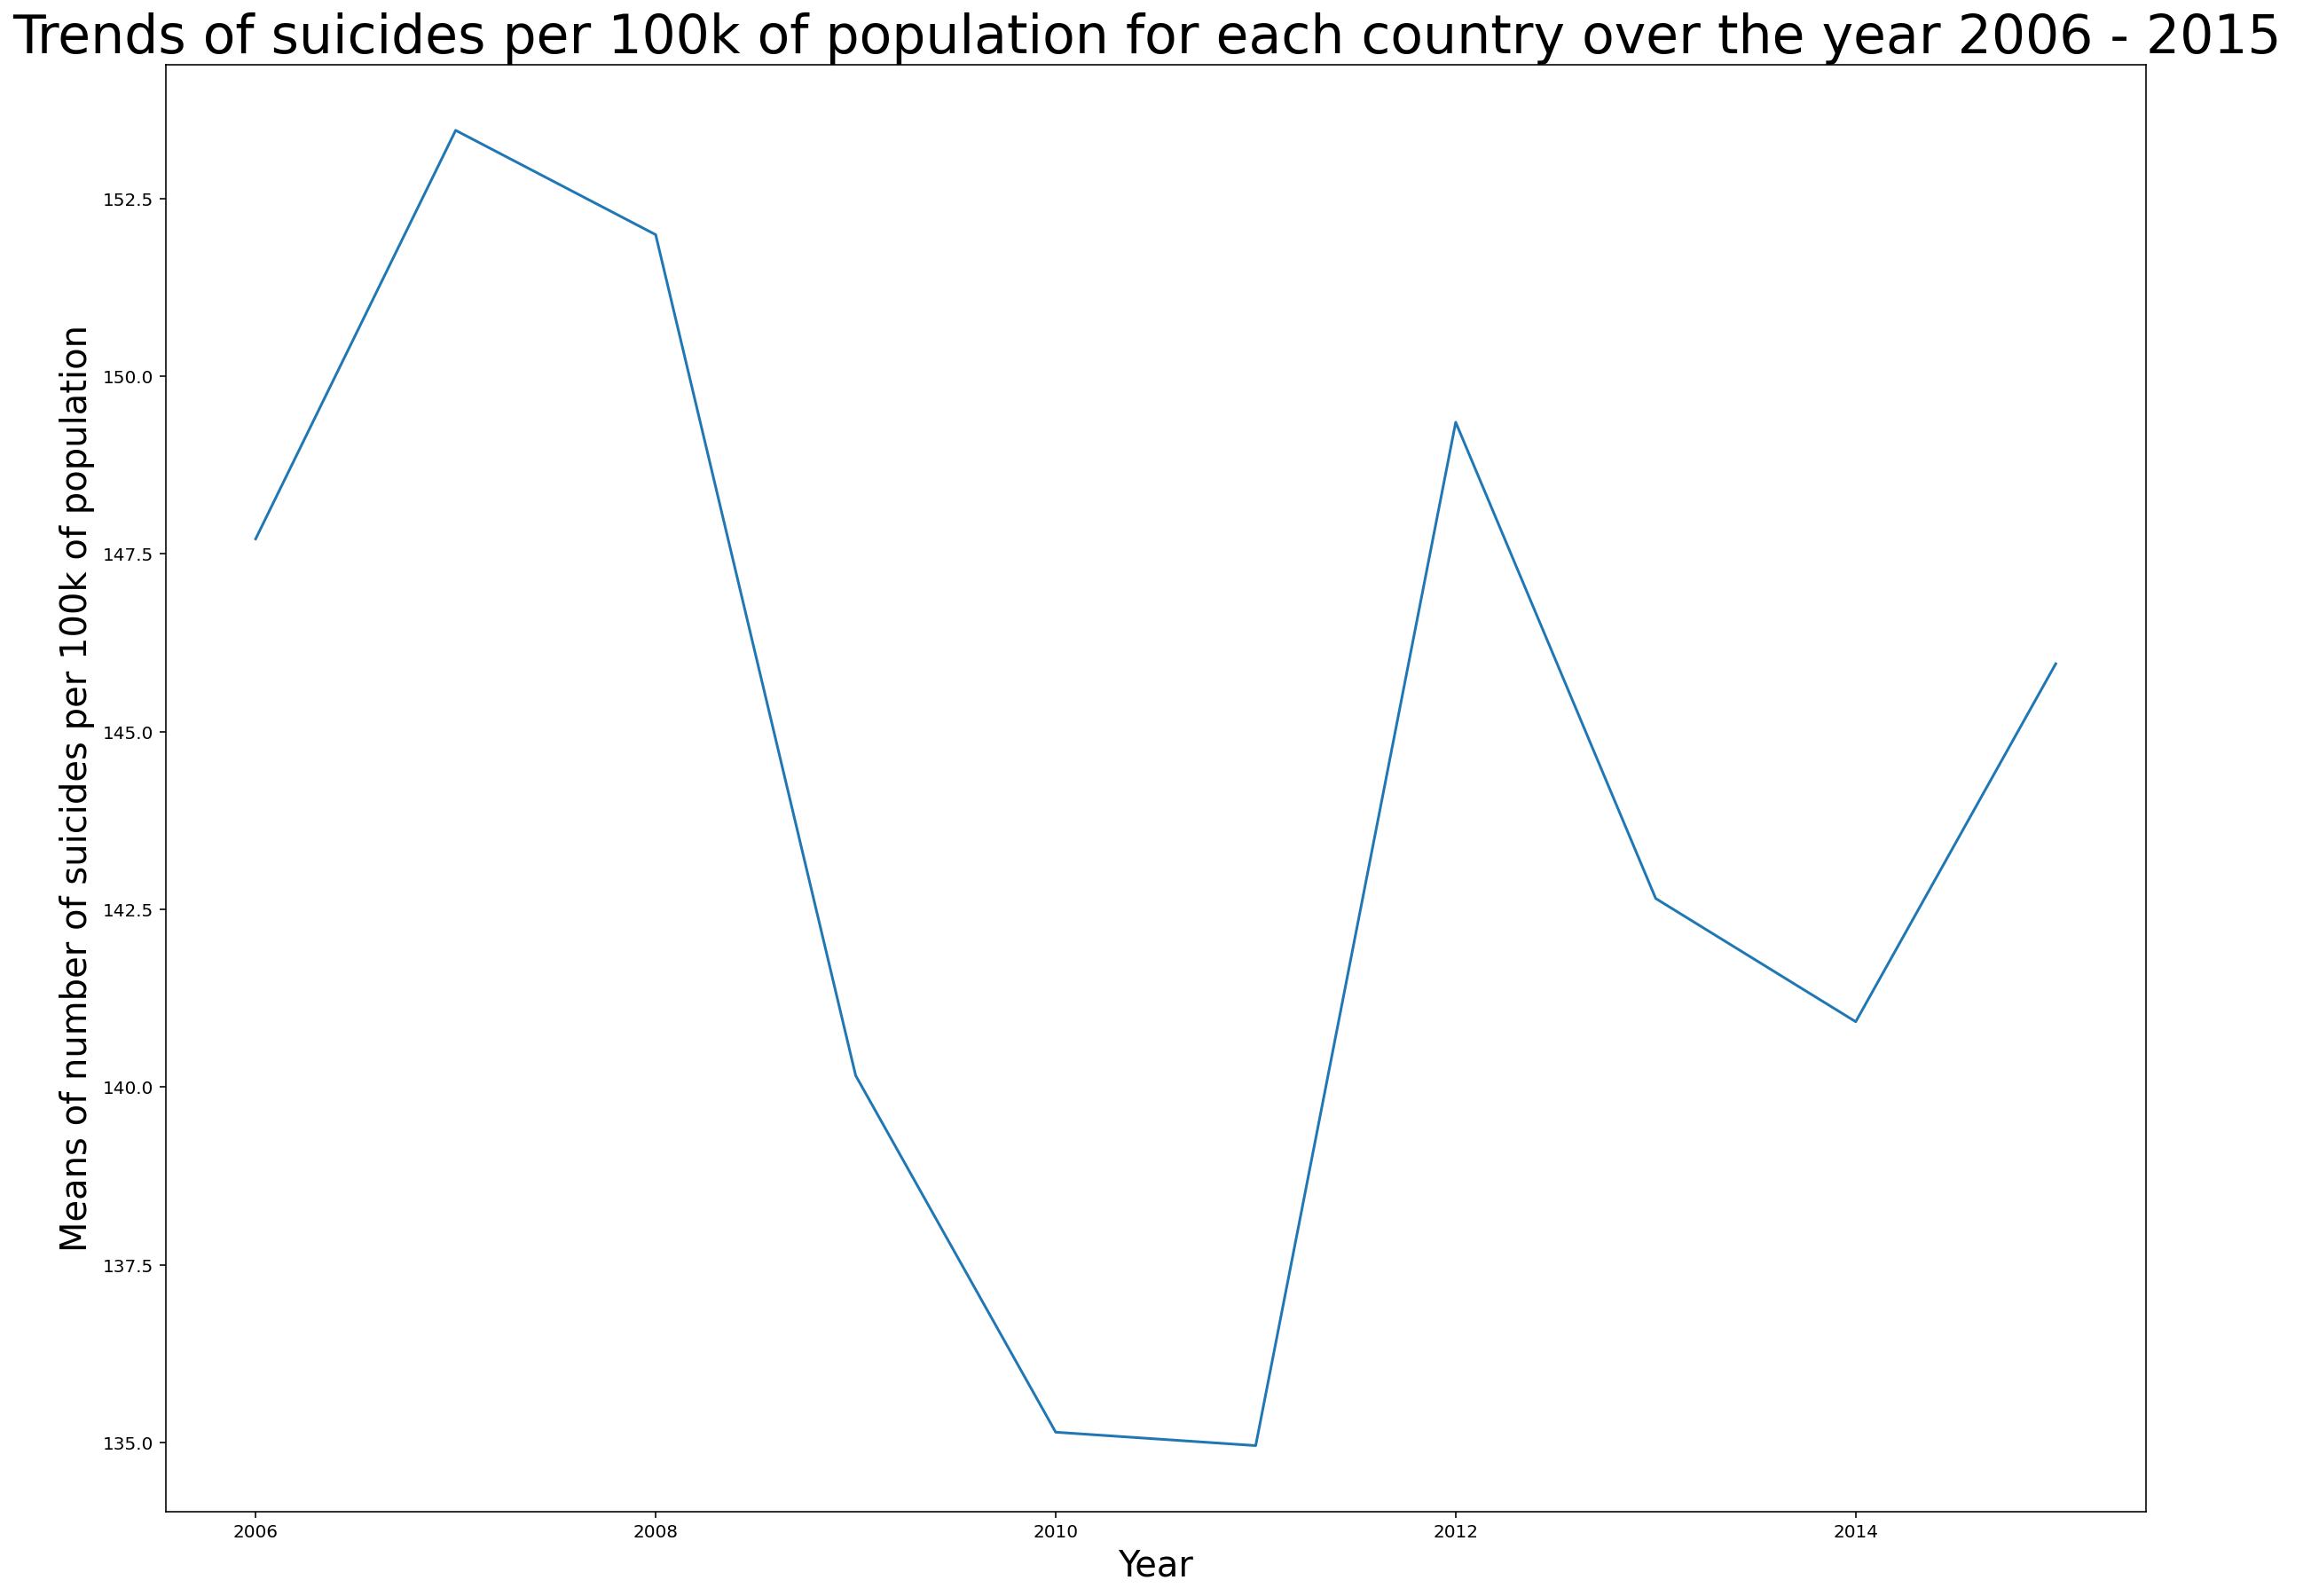

In [14]:
plt.figure(figsize=(20, 15))
listm = []
listy = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
for yea in listy:
    list1 = []
    for index, row in df.iterrows():
        if row.year == yea:
            list1.append(row)
    df2 = pd.DataFrame(list1, columns=col)
    meanS = df2['suicides/100k pop'].mean()
    listm.append(meanS)

plt.plot(listy, listm)
plt.xlabel('Year', fontsize = 20)
plt.title('Trends of suicides per 100k of population for each country over the year 2006 - 2015 ', fontsize = 30)
plt.ylabel('Means of number of suicides per 100k of population', fontsize = 20)

As we can can see from these graphs, the suicide rates changes sporadically throughout the years. This could be due to many different factors, such as natural disasters, wars, etc. In the above graph, we notice that the suicide rate between 2006 - 2008 is particularly high, and we think that this is mainly because the fiancial crisis of 2007 - 2008 that impacted the whole world. To minimize the influence of such events, we decided to focus on the specific year of 2011.

In [15]:
df2011 = df.loc[df['year'] == 2011]
df2011.reset_index(inplace = True)

df2011

,index,country-year,suicides/100k pop,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,country,year
0,8,Argentina2011,105.87,9.805691,0.889073,66.690605,0.815802,-0.168666,0.754646,Argentina,2011
1,18,Armenia2011,32.98,8.825190,0.705108,64.919090,0.464525,-0.209035,0.874601,Armenia,2011
2,26,Australia2011,133.22,10.639769,0.967029,72.028244,0.944586,0.353017,0.381772,Australia,2011
3,34,Austria2011,211.49,10.692453,0.944157,70.985039,0.939356,0.122097,0.702721,Austria,2011
4,42,Bahrain2011,14.96,10.588520,0.907868,65.372444,0.869870,-0.066273,0.582522,Bahrain,2011
...,...,...,...,...,...,...,...,...,...,...,...
56,529,Turkey2011,23.07,9.791085,0.691902,64.601753,0.445607,-0.243728,0.648596,Turkey,2011
57,545,Ukraine2011,264.00,9.021824,0.859459,62.830757,0.578669,-0.208983,0.932535,Ukraine,2011
58,557,United Kingdom2011,78.29,10.507535,0.948711,70.957245,0.899774,0.324735,0.437595,United Kingdom,2011
59,567,United States2011,162.36,10.815396,0.921705,69.682312,0.863202,0.143349,0.696926,United States,2011


Then, we look at each variables too find if anything is off.

In [16]:
df2011.describe()

,index,suicides/100k pop,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,year
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,283.229508,134.956066,9.889374,0.868650,66.967976,0.774468,-0.018360,0.731809,2011.0
std,168.476348,88.152176,0.743263,0.083080,4.638812,0.152782,0.175992,0.222206,0.0
min,8.000000,1.310000,7.979546,0.502937,47.797943,0.333312,-0.325171,0.098924,2011.0
25%,139.000000,67.830000,9.439219,0.836042,64.598373,0.665864,-0.159780,0.662167,2011.0
50%,279.000000,126.330000,9.941364,0.892697,66.779282,0.815802,-0.065954,0.782946,2011.0
75%,420.000000,186.240000,10.488527,0.921286,70.777657,0.899774,0.089614,0.909116,2011.0
max,583.000000,407.690000,11.419420,0.977378,74.849838,0.961831,0.389882,0.976917,2011.0


Then, we want to see the data distribution of our six factors: “logged GDP per capita”, “social support”, “healthy life expectancy”, “freedom to make life choices”, “generosity”, and “perception of corruption” 

## Log GDP per capita

Text(0, 0.5, 'Density')

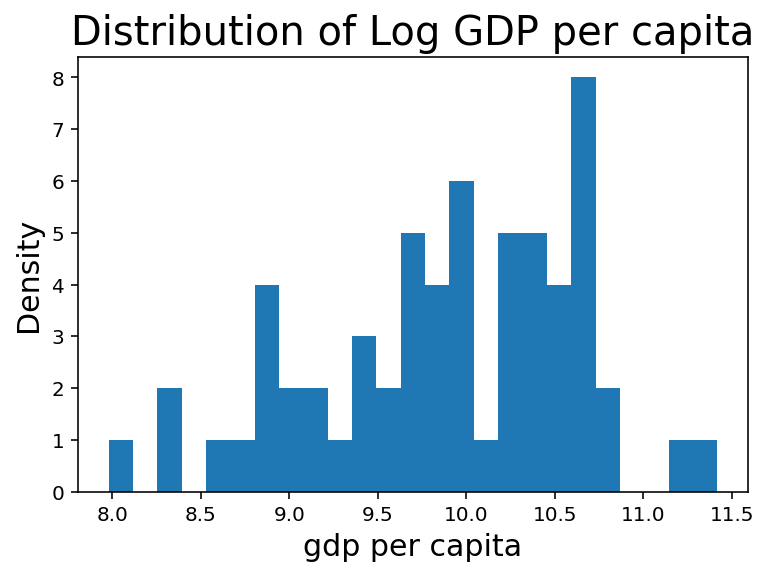

In [17]:
#Plots the distribution of Log GDP per capita
ax = df2011['Log GDP per capita'].plot(kind = 'hist', bins = 25)
ax.set_title('Distribution of Log GDP per capita', fontsize = 20)
ax.set_xlabel("gdp per capita", fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)

This distribution is slightly skewed left, however, since the data has been processed with log transformation, we conclude that the original data would be more imbalanced, in other words, more skewed.

## Social Support

Text(0, 0.5, 'Density')

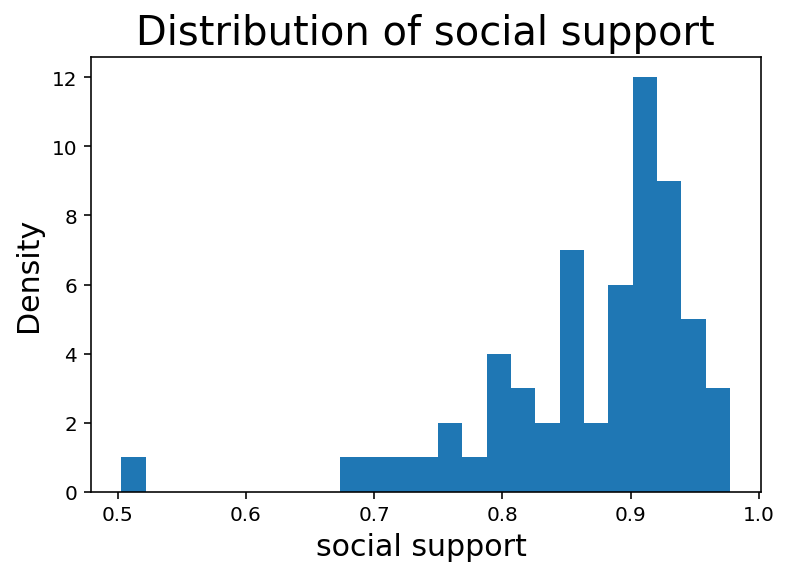

In [18]:
#Plots the distribution of Social support
ax = df2011['Social support'].plot(kind = 'hist', bins = 25)
ax.set_title('Distribution of social support', fontsize = 20)
ax.set_xlabel("social support ", fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)

It is noticible that most of the social support is between 0.8 and 0.9. However, there is a outlier on the graph shows that it's significantly lower than the others.

## Healthy life expectancy at birth

Text(0, 0.5, 'Density')

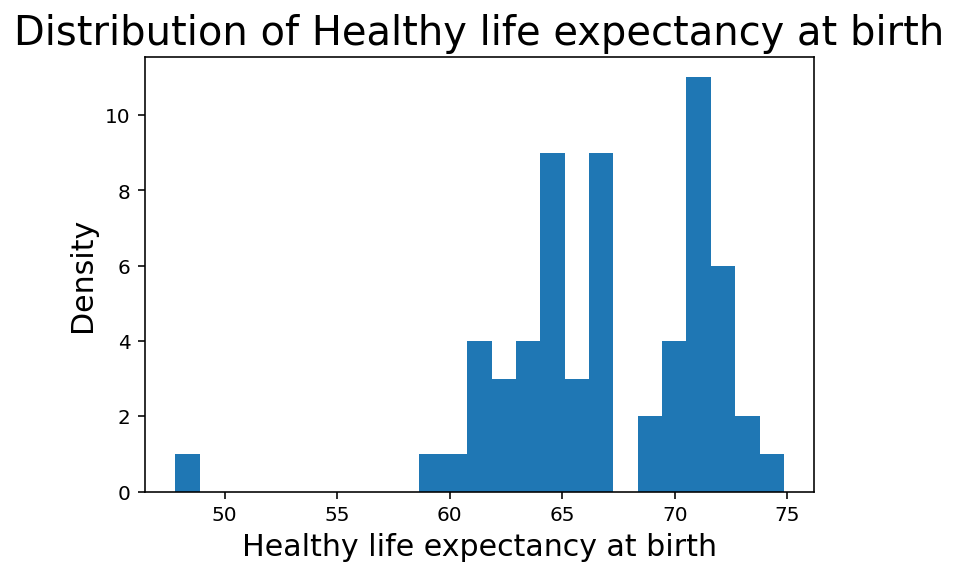

In [19]:
#Plots the distribution of Healthy life expectancy at birth
ax = df2011['Healthy life expectancy at birth'].plot(kind = 'hist', bins = 25)
ax.set_title('Distribution of Healthy life expectancy at birth', fontsize = 20)
ax.set_xlabel("Healthy life expectancy at birth", fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)

Most country has life expectancy around 65 to 75.

## Freedom to make life choices

Text(0, 0.5, 'Density')

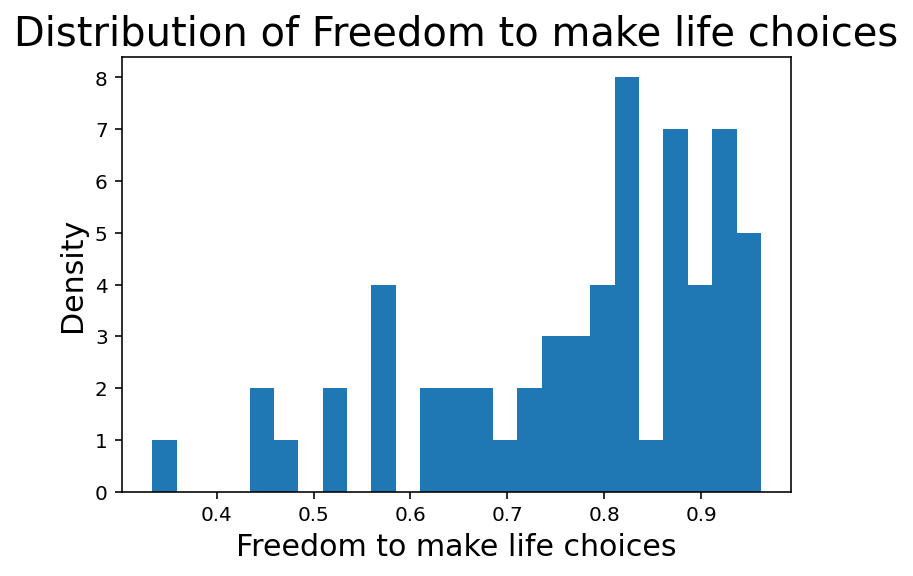

In [20]:
#Plots the distribution of Freedom to make life choices
ax = df2011['Freedom to make life choices'].plot(kind = 'hist', bins = 25)
ax.set_title('Distribution of Freedom to make life choices', fontsize = 20)
ax.set_xlabel("Freedom to make life choices", fontsize = 15)
ax.set_ylabel('Density', fontsize = 15)

This distribution is skewed left, so we decided to perform log transformation to this data.

## Generosity

Text(0, 0.5, 'density')

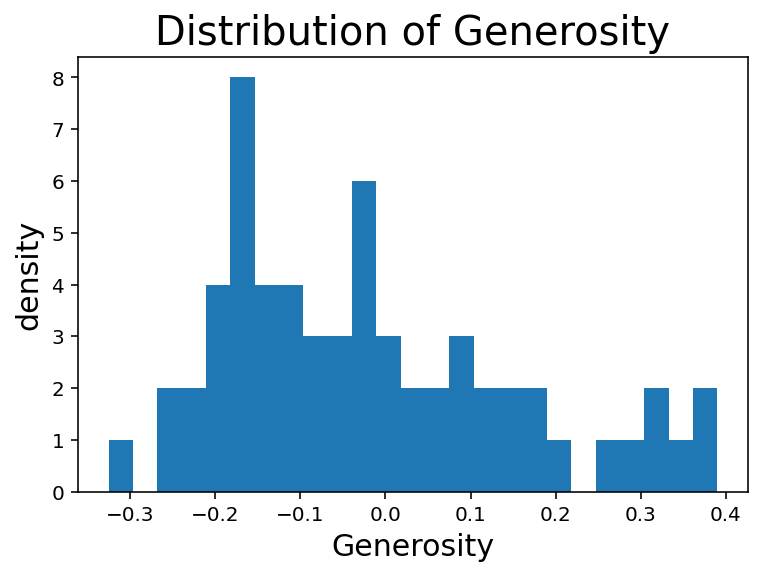

In [21]:
#Plots the distribution of Generosity
ax = df2011['Generosity'].plot(kind = 'hist', bins = 25)
ax.set_title('Distribution of Generosity', fontsize = 20)
ax.set_xlabel("Generosity", fontsize = 15)
ax.set_ylabel('density', fontsize = 15)

Compared to other variable, the distribution of generosity is more like a normal distribution centered at 0.

## Perceptions of corruption

Text(0, 0.5, 'density')

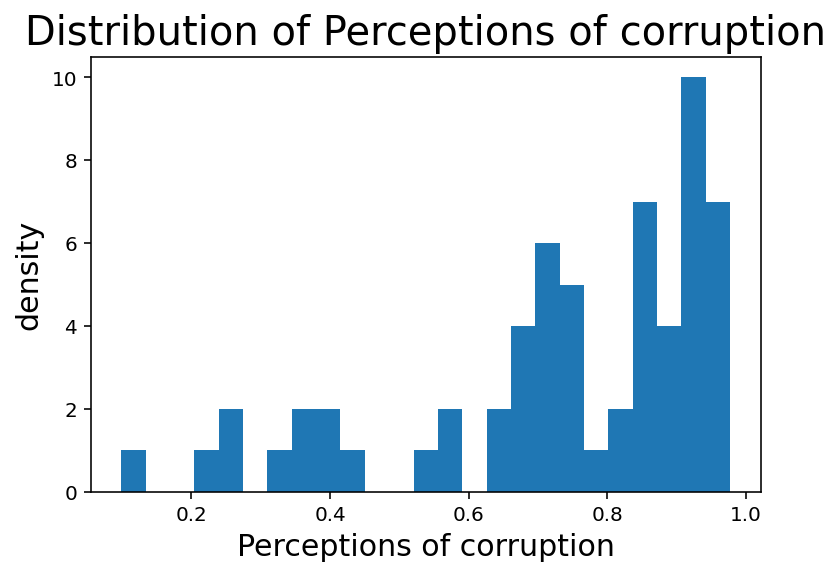

In [22]:
#Plots the distribution of Perceptions of corruption
ax = df2011['Perceptions of corruption'].plot(kind = 'hist', bins = 25)
ax.set_title('Distribution of Perceptions of corruption', fontsize = 20)
ax.set_xlabel("Perceptions of corruption", fontsize = 15)
ax.set_ylabel('density', fontsize = 15)

In this data, we see that in most countries perceives high level of corruption, which may potentially effect the level of happiness.

We define a function to perform log transformation.

In [23]:
def logtrans(num):
    if num<=0:
        return 0
    else:
        return np.log10(num)

After seeing the distribution of data for these six factors, it seems like we need to perform transformation on some of the  data.

In [24]:
logg10 = np.log10(df2011['Log GDP per capita'])
so10 = np.log10(df2011['Social support'])
hea10 = np.log10(df2011['Healthy life expectancy at birth'])
free10 = np.log10(df2011['Freedom to make life choices'])
gene10 = df2011['Generosity'].apply(logtrans)
perc10 = np.log10(df2011['Perceptions of corruption'])

pd.options.mode.chained_assignment = None

df2011['hea10'] = hea10
df2011['logg10'] = logg10
df2011['so10'] = so10
df2011['free10'] = free10
df2011['gene10'] = gene10
df2011['perc10'] = perc10

## Correlation within these variables

In [25]:
#Groups the six factor into one single data frame and if anything looks off
df_f = df2011[['logg10', 'so10','hea10','free10','gene10','perc10']]
df_f.describe()

,logg10,so10,hea10,free10,gene10,perc10
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.993926,-0.063429,1.824772,-0.121076,-0.352768,-0.166982
std,0.033398,0.046712,0.031665,0.099473,0.535643,0.191437
min,0.901978,-0.298486,1.679409,-0.477149,-2.163034,-1.004696
25%,0.974936,-0.077772,1.810222,-0.176614,-0.685738,-0.179033
50%,0.997446,-0.049296,1.824642,-0.088415,0.000000,-0.106268
75%,1.020715,-0.035606,1.849896,-0.045866,0.000000,-0.041381
max,1.057644,-0.009938,1.874191,-0.016901,0.000000,-0.010142


We want to find if there are any correlation within these six factors.

In [26]:
#functions to output the table of correlations between different factors
df_f.corr()

,logg10,so10,hea10,free10,gene10,perc10
logg10,1.000000,0.547261,0.664154,0.324751,-0.081603,-0.397977
so10,0.547261,1.000000,0.315963,0.573541,-0.138152,-0.161670
hea10,0.664154,0.315963,1.000000,0.160790,-0.022592,-0.345691
free10,0.324751,0.573541,0.160790,1.000000,-0.340490,-0.386574
gene10,-0.081603,-0.138152,-0.022592,-0.340490,1.000000,0.155997
perc10,-0.397977,-0.161670,-0.345691,-0.386574,0.155997,1.000000


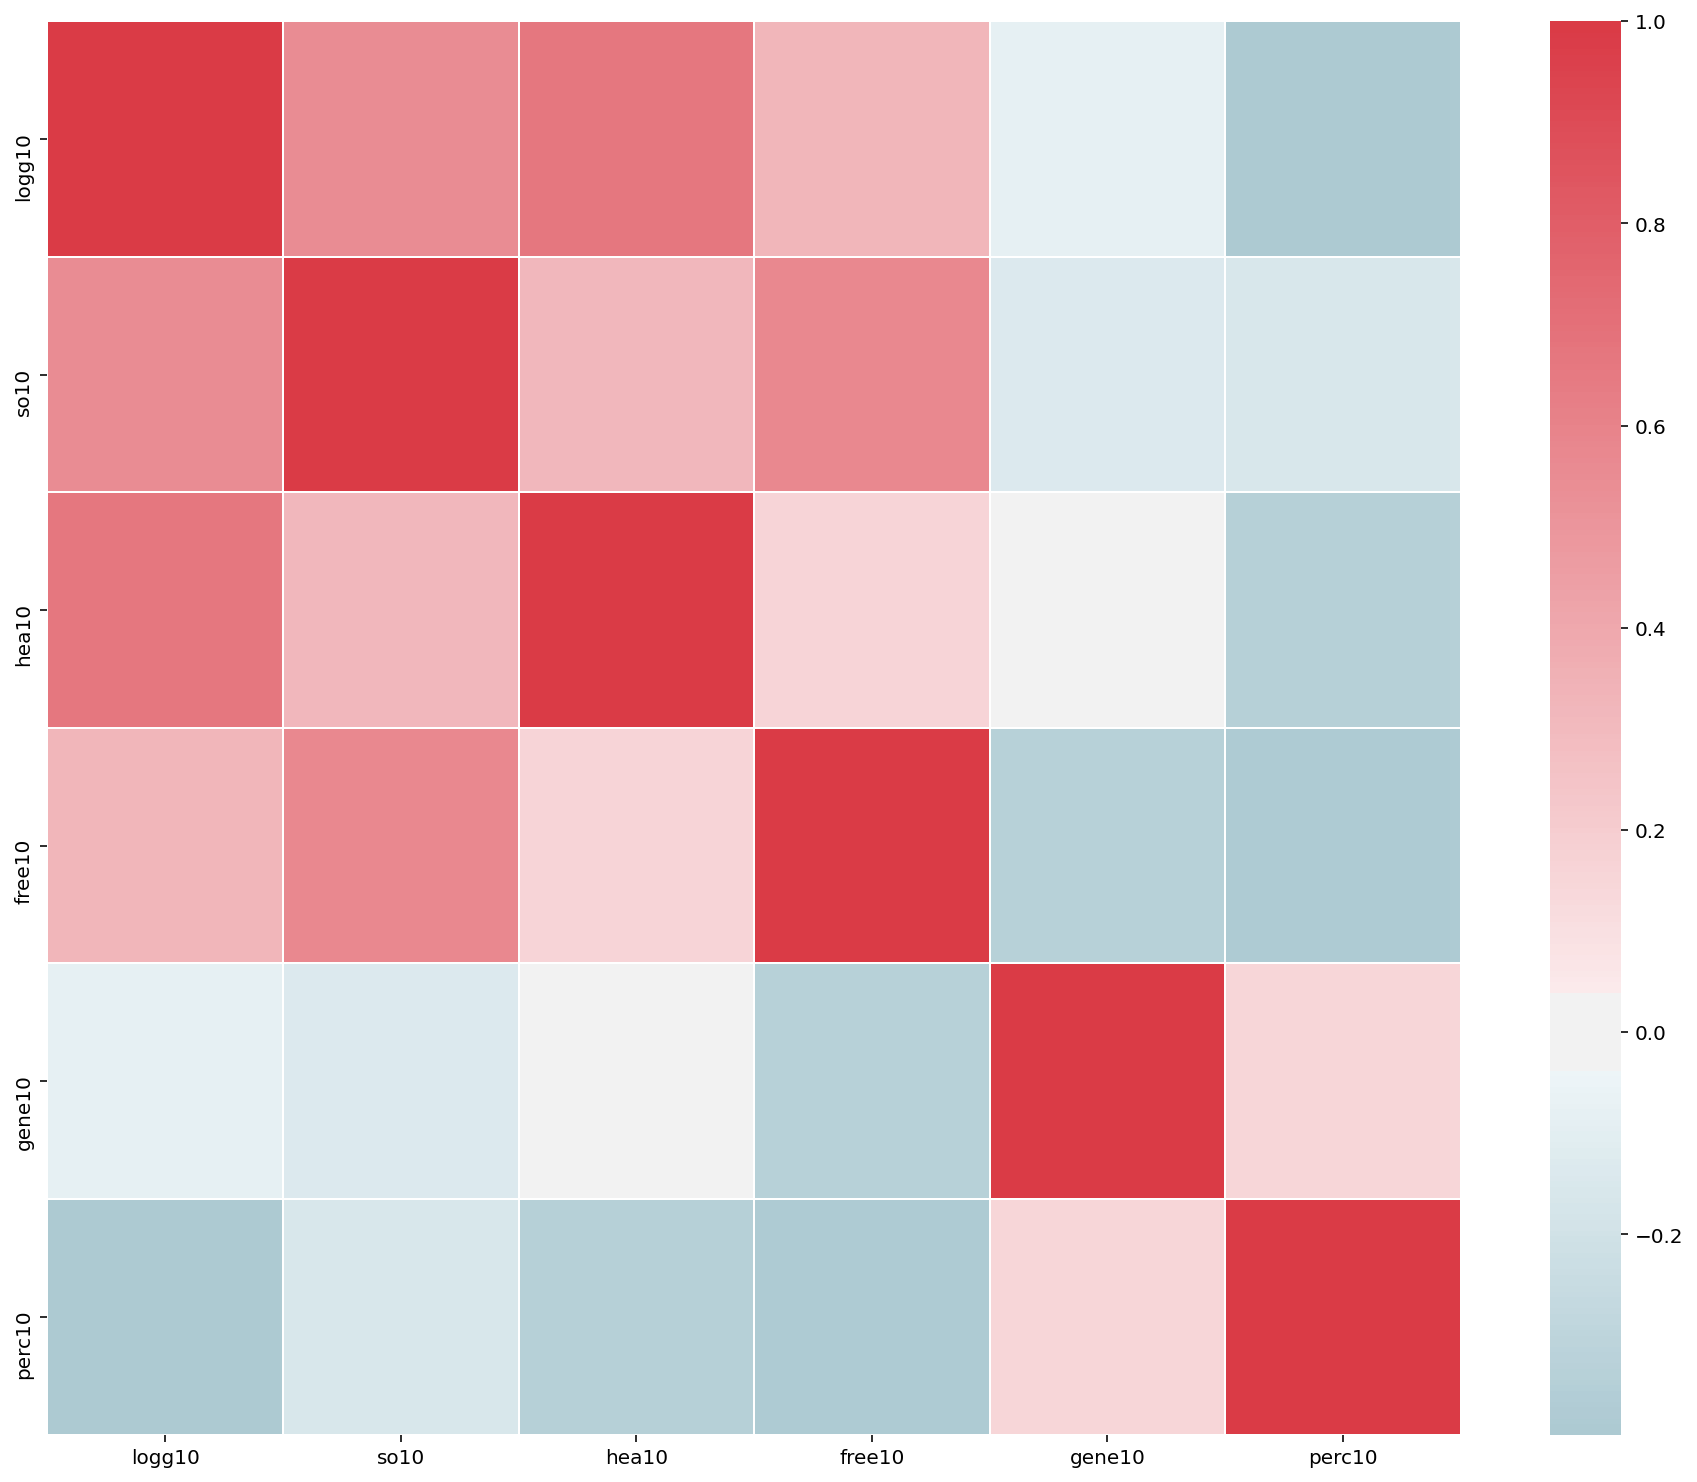

In [27]:
#Creates heat map to show correlation between factors
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize = (16,13))
sns.heatmap(df_f.corr(), center=0, cmap=cmap,
            square=True, linewidths=.5,)

The heat map provides us with a numerical value of the correlation between each variable. The darker red is showing high positive correlation and the darker blue is showing negative correlation. Overall, these factors has little correlation between each other with two exceptions.

Linear regression can be used to determine whether a change in a subfacoter of wellbeing is related to the change in suicide rate. The regression line is a model of the data. Models are mathematical equations generated to represent the real life situation.

Text(-1.5750000000000028, 0.5, 'Freedom to make life choices')

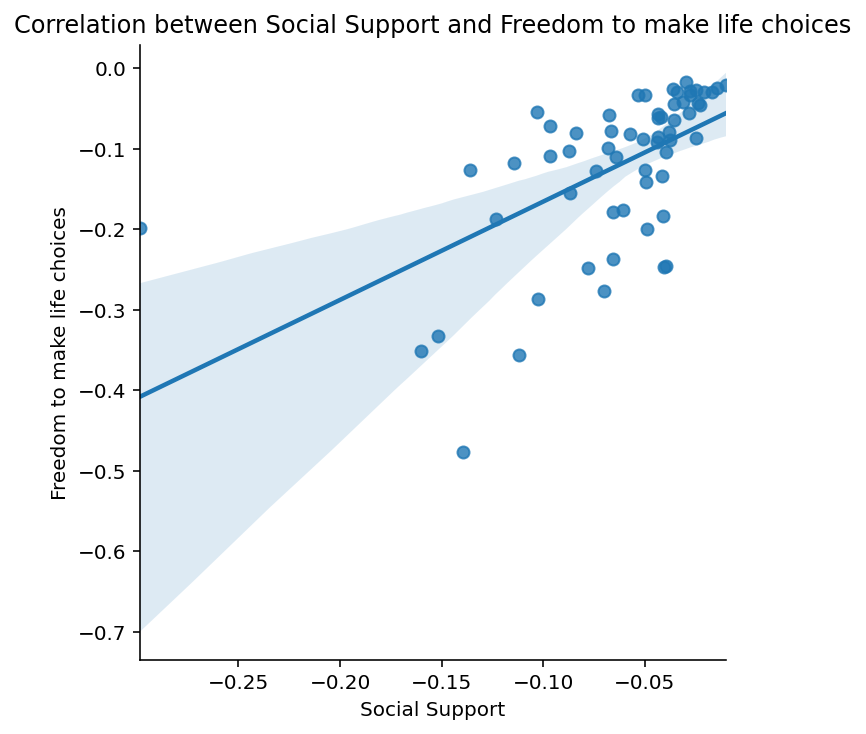

In [32]:
sns.lmplot(x='so10', y='free10', 
           data=df2011);



#Setting the titles for the graph
plt.title('Correlation between Social Support and Freedom to make life choices')
plt.xlabel('Social Support')
plt.ylabel('Freedom to make life choices')

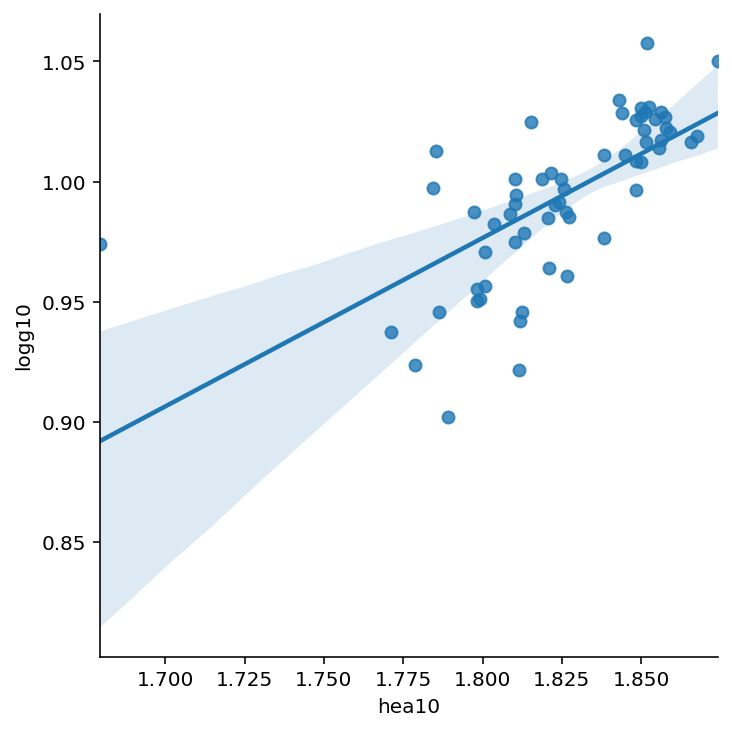

In [29]:
sns.lmplot(x='hea10', y='logg10', 
           data=df2011);


#Setting the titles for the graph
plt.title('Correlation between Log GDP per capita and Healthy life expectancy at birth')
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Log GDP per capita')

As we can see, these pairs of facotors are positively correlated with each other. 

There is a positive correlation between "social support" and "freedom to make life choices". And there is a positive correclation between "healthy life expectancy at birth" and "Log GDP per capita". 

Thus, the dataset has homoscedasticity, which means it has high intercorrelations among two or more independent variables. Multicollinearity among independent variables will result in less reliable statistical inferences. And it will be less effective to predict the suicide rate in the regression model. 

## Analysis

#### We use the scatter plots to visualize relationships between subfactor of wellbeing and suicide rate.

In [35]:
variables =  ['logg10',
             'so10',
             'hea10',
             'free10',
             'gene10',
             'perc10',
             ]

#### The correlation between social support and suicide rate

Text(-4.700000000000003, 0.5, 'suicides/100k pop')

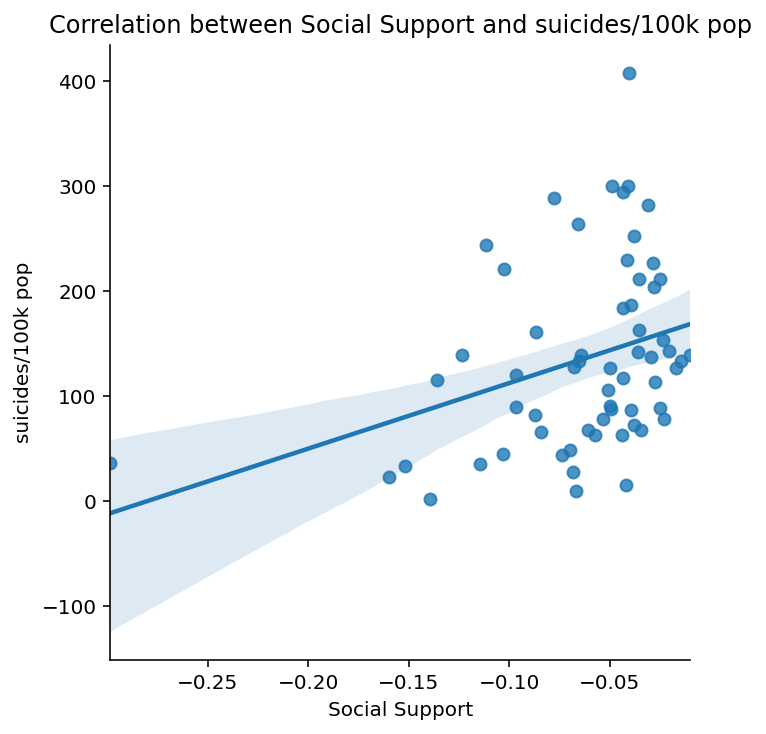

In [36]:
sns.lmplot(x='so10', y='suicides/100k pop', data=df2011);

#Setting the titles for the graph
plt.title('Correlation between Social Support and suicides/100k pop')
plt.xlabel('Social Support')
plt.ylabel('suicides/100k pop')

In [37]:
# We can specify our model matrix using `pastsy`.
df2011.rename(columns={'suicides/100k pop':'suicide'}, inplace=True)
outcome, predictors = patsy.dmatrices('so10 ~ suicide', df2011)
model = sm.OLS(outcome, predictors)


## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   so10   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     7.245
Date:                Wed, 17 Mar 2021   Prob (F-statistic):            0.00924
Time:                        20:20:32   Log-Likelihood:                 104.37
No. Observations:                  61   AIC:                            -204.7
Df Residuals:                      59   BIC:                            -200.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0871      0.010     -8.318      0.0

In the regression model, suicide rate and social support shows no sign of correlation.

For instance, when X = -0.08, the corresponding values of Y range all over the place from Y = 0 to Y = 300. The same is true for other values of X. The plot is lack of predictablility in determining suicide rate from a given value of social support.

#### The correlation between Log GDP per capita and suicide rate

Text(3.674999999999997, 0.5, 'suicides/100k pop')

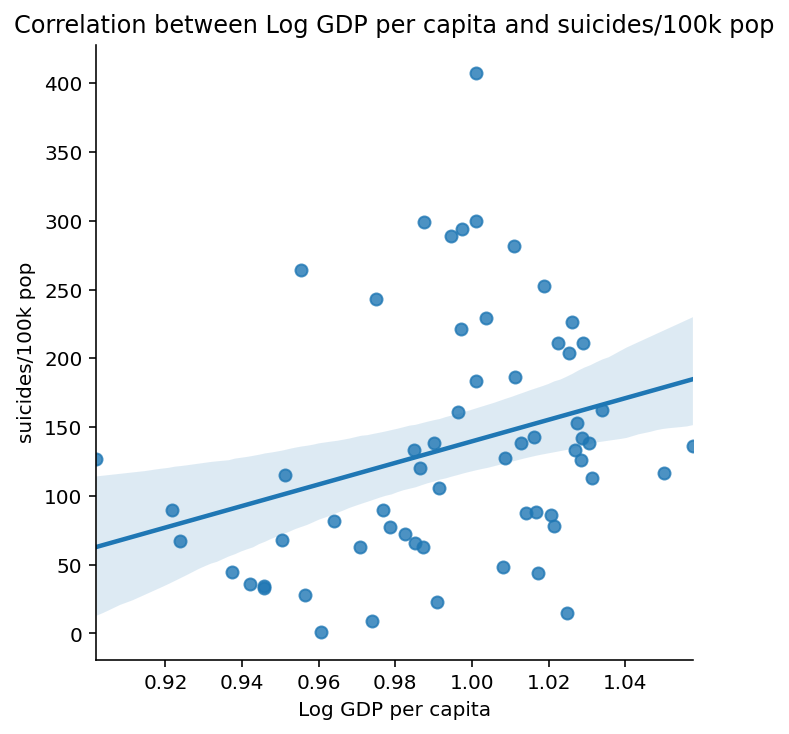

In [38]:
sns.lmplot(x='logg10', y='suicide', data=df2011);

#Setting the titles for the graph
plt.title('Correlation between Log GDP per capita and suicides/100k pop')
plt.xlabel('Log GDP per capita')
plt.ylabel('suicides/100k pop')

In [39]:
outcome, predictors = patsy.dmatrices('logg10 ~ suicide', df2011)
model = sm.OLS(outcome, predictors)


## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 logg10   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     5.706
Date:                Wed, 17 Mar 2021   Prob (F-statistic):             0.0201
Time:                        20:20:37   Log-Likelihood:                 124.12
No. Observations:                  61   AIC:                            -244.2
Df Residuals:                      59   BIC:                            -240.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9787      0.008    129.231      0.0

The further the points are to the regression line, the more uncertain we are in the estimate. In the regression model, suicide rate and Log GDP per capita shows no sign of correlation.

#### The correlation between healthy life expentancy at birth and suicide rate

Text(3.674999999999997, 0.5, 'suicides/100k pop')

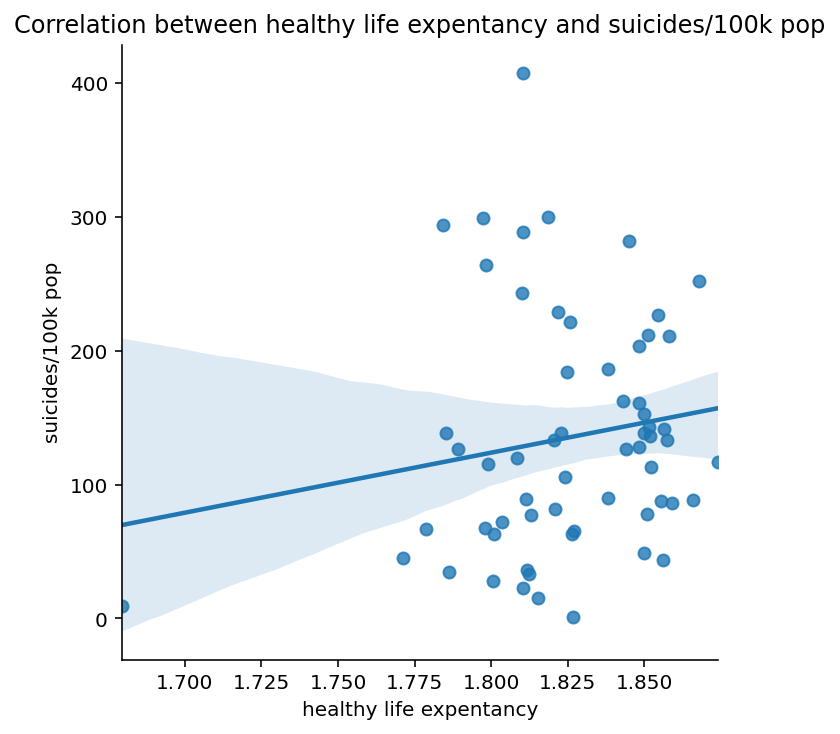

In [40]:
sns.lmplot(x='hea10', y='suicide', data=df2011);

#Setting the titles for the graph
plt.title('Correlation between healthy life expentancy and suicides/100k pop')
plt.xlabel('healthy life expentancy')
plt.ylabel('suicides/100k pop')

In [41]:
outcome, predictors = patsy.dmatrices('hea10 ~ suicide', df2011)
model = sm.OLS(outcome, predictors)


## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  hea10   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.573
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.215
Time:                        20:20:49   Log-Likelihood:                 125.36
No. Observations:                  61   AIC:                            -246.7
Df Residuals:                      59   BIC:                            -242.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8170      0.007    244.826      0.0

In the regression model, suicide rate and  healthy life expentancy at birth shows no sign of correlation. The points are not homoscedastic, which means points at this end are much further from the line than at the other end. Therefore, linear regression does not apply to this dataset. 

#### The correlation between freedom to make life choices and suicide rate

Text(3.674999999999997, 0.5, 'suicides/100k pop')

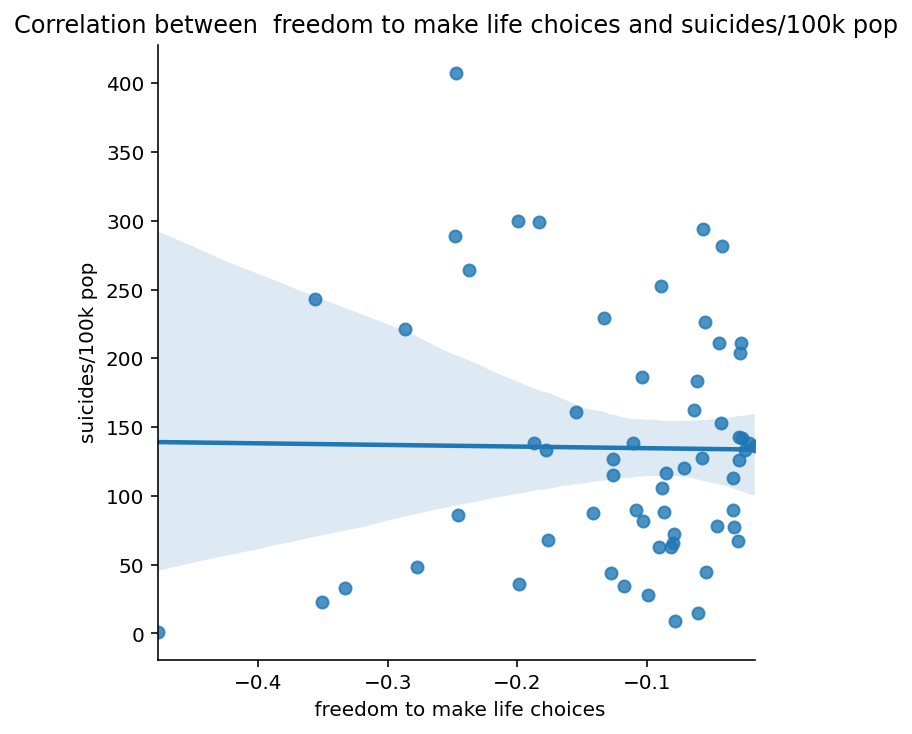

In [42]:
sns.lmplot(x='free10', y='suicide', data=df2011);

#Setting the titles for the graph
plt.title('Correlation between  freedom to make life choices and suicides/100k pop')
plt.xlabel(' freedom to make life choices')
plt.ylabel('suicides/100k pop')

In [43]:
outcome, predictors = patsy.dmatrices('free10 ~ suicide', df2011)
model = sm.OLS(outcome, predictors)


## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 free10   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                   0.01046
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.919
Time:                        20:21:16   Log-Likelihood:                 54.734
No. Observations:                  61   AIC:                            -105.5
Df Residuals:                      59   BIC:                            -101.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1190      0.024     -5.040      0.0

In the regression model, suicide rate and freedom to make life choices shows no sign of correlation. The points are not homoscedastic, which means points at this front are much further from the line than at the other end. Therefore, linear regression does not apply to this dataset. 

#### The correlation between generosity and suicide rate

Text(3.674999999999997, 0.5, 'suicides/100k pop')

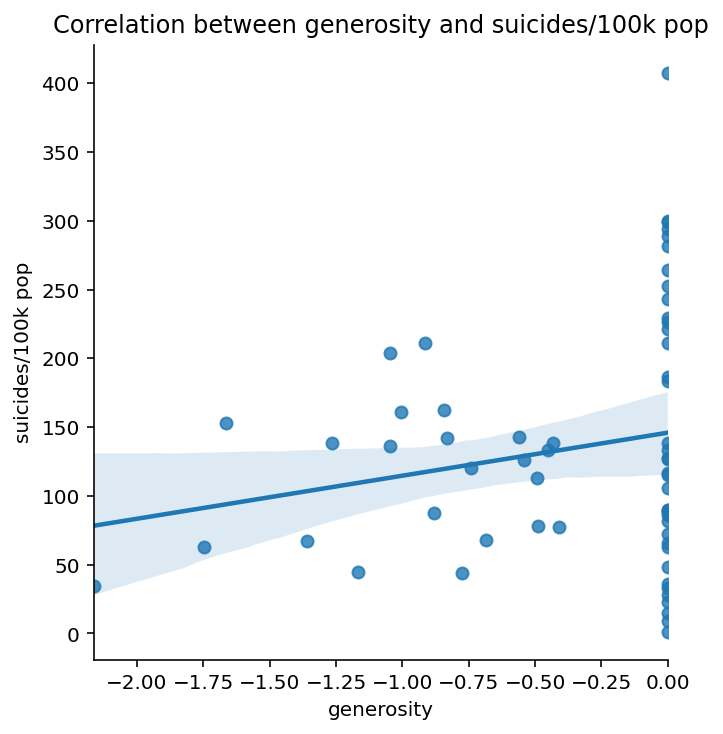

In [44]:
sns.lmplot(x='gene10', y='suicide', data=df2011);

#Setting the titles for the graph
plt.title('Correlation between generosity and suicides/100k pop')
plt.xlabel('generosity')
plt.ylabel('suicides/100k pop')

In [45]:
outcome, predictors = patsy.dmatrices('gene10 ~ suicide', df2011)
model = sm.OLS(outcome, predictors)


## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 gene10   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.214
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.142
Time:                        20:21:40   Log-Likelihood:                -46.846
No. Observations:                  61   AIC:                             97.69
Df Residuals:                      59   BIC:                             101.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5087      0.125     -4.074      0.0

In the regression model, suicide rate and generosity shows no sign of correlation, because the data distribution has no homoscedasticity. Homoscedasticity describes a situation in which the error term (random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent variables. When generosity equals to 0, the homogeneity of variance is larger than other parts of the data. Therefore, the lack of homoscedasticity may increases the likelihood that the coefficient estimates are further from the correct population value.

#### The correlation between perceptions of corruption and suicide rate

Text(3.674999999999997, 0.5, 'suicides/100k pop')

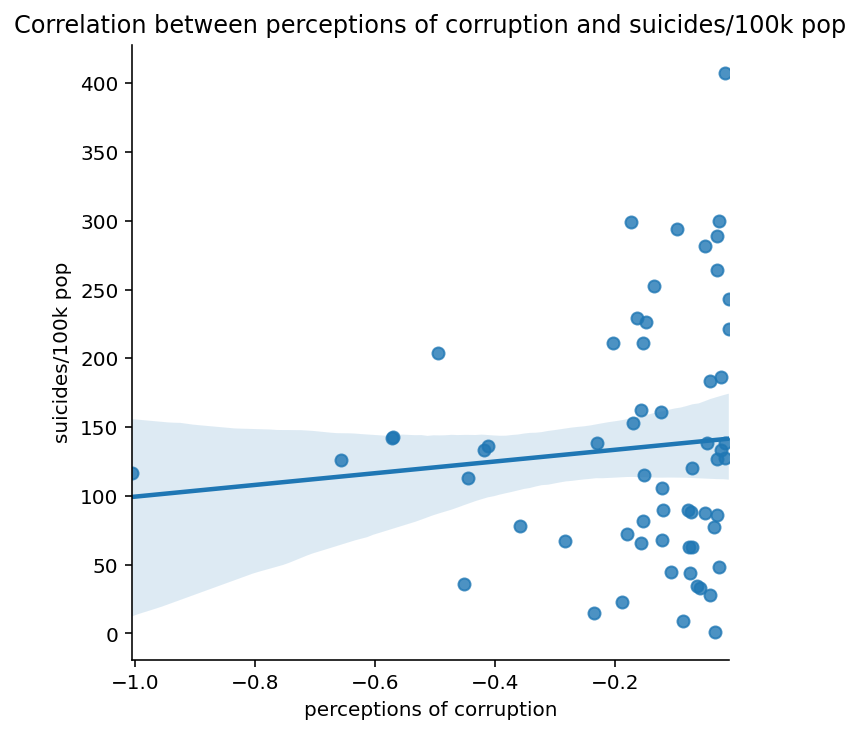

In [46]:
sns.lmplot(x='perc10', y='suicide', data=df2011);

#Setting the titles for the graph
plt.title('Correlation between perceptions of corruption and suicides/100k pop')
plt.xlabel('perceptions of corruption')
plt.ylabel('suicides/100k pop')

In [47]:
outcome, predictors = patsy.dmatrices('perc10 ~ suicide', df2011)
model = sm.OLS(outcome, predictors)


## fit the model
results = model.fit()

## look at the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 perc10   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.5090
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.478
Time:                        20:21:56   Log-Likelihood:                 15.056
No. Observations:                  61   AIC:                            -26.11
Df Residuals:                      59   BIC:                            -21.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1941      0.045     -4.288      0.0

In the regression model, suicide rate and perceptions of corruption show no sign of correlation. The points are not homoscedastic, which means points at this end are much further from the line than at the other end. Therefore, linear regression does not apply to this dataset. 

We can see from the six plots above, the subfactor of wellbeing has no correlation with suicide rate. As the value of a factor increases, the suicide rate is not affected. The points on the scatter plots seem to be scattered randomly, so the relationship are nonlinear. Therefore, the regression lines on the plots are not able to make predictions.

# Ethics & Privacy

All the data that we utilize in this research is found from the World Happiness Report and Suicide Rates Overview 1985 to 2016, which are both publicly available on the internet. The data from both reports are trustworthy, being collected from the World Health Organization (WHO), World Development Indicators (WDI), and Gallup World Poll (GWP). Neither report contains any personal information from the any participants, which implies privacy considerations would not apply. The datasets we used does not contain any discrimination, which allowed us to use both datasets in our research.

However, a few concerns should be considered when utilizing these datasets. Firstly, according to World Happiness Report, data of “freedom to make life choices”, “Generosity”, and “perceptions of corruption” is collected by GWP, which is a formal organization that uses both telephone surveys and face-to-face survey for data collection. This may potentially exclude huge proportion of participants from poorer area which does not have telephone system, which may cause the dataset to contain bias.

During the analyzing stage, we have ensured that our visualization, statistics and reports honestly represent the underlying data and there is no potential discrimination in our models. However, base on the dataset we use, it is possible that our model may be misused. For example, if in the future analysis we find out that “Logged GDP per capita” highly correlate to the suicide rate when we are using our model, the results may target the countries which has lower GDP and may cause unnecessary harm to people from these countries. Therefore, we should ensure that the model can be justified and monitored to prevent unintended uses and abuse of the model.

# Conclusion & Discussion

Based on our analysis, we could not conclude that there is any significant correlation between the subfactors of wellbeing measured in the World Happiness Report and the suicide rate. In our research, we first used the heat map to examine the correlation between the subfactors, then used linear scatter plot to test whether there is significant correlation between each subfactor and the suicide rate. The results showed that all the subfactors are not significantly relate to the suicide rate.

Our research is test based on scatter plot and linear regression, which further statical tests may be applied to reinforce our conclusion. It is also possible that there exists correlation between several subfactors of World Happiness level together. We then use linear relationship, no multicollinearity, no auto-correlation and homoscedasticity to determine if linear regression can be applied to the dataset. We find out that all the scatter plots we analyze are lack of one or more assumptions of linear regression. Therefore, based on what we have on our scatter plots, we can only identify very week linear correlation in some of the subfactors which are insufficient to make prediction. 

Our research also contains some limitations that may influence our results. As mentioned above, some of the subfactors of World Happiness Report are collected by the GWP, which used both telephone surveys and face-to-face survey for data collection. This would potentially exclude the data from poorer countries and cause the data to be better represent of richer countries which telephone is widely used. Therefore, it is doubtful that whether the result of this research can be applied to the entire world. The data of “freedom to make life choices” and “perceptions of corruption” is based on asking participants to make binary response to the questions “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” and “Is corruption widespread throughout the government or not?” However, these questions are much complicated than just providing answers of “yes” and “no”, which means that participants' answers may not fully represent their true ideas. 

Although there is no significant correlation is found in our research, it can serve as a reference for future research related to suicide rates. Since none of the six subfactors we choose from World Happiness Report relate to suicide rate, we may say that the happiness level in a country may not be a factor of high suicide rate, which then suggest us to investigate other factors. It is also possible that the World Happiness Report is not sufficiently representative of the true happiness level in each country and we should seek better metrics and justifications for measuring happiness level. Overall, more testing and examination is required for further research of suicide rate.

# Team Contributions

- Qianying Huang: Data analysis, Visualizations, Ethics
- Yang Zheng: Import, wrangle Data, project proposal, final edits
- Zhigang Lin: EDA, wrangle Data, Data Analysis
- Youyou Wu: Complete analysis and results and final discussion
- Ethan Huang : Finalize wrangling/EDA; Begin Analysis